# Finding heavy traffic indicator on the I-94


The [I-94](https://en.wikipedia.org/wiki/Interstate_94) is an east–west Interstate Highway connecting the Great Lakes and northern Great Plains regions of the United States. 

We are going to analyze a dataset compiled with the hourly Westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St Paul, MN. The dataset is available [here](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume).

The goal of this project is to identify heavy traffic indicators on the I-94 in the proximity of the station, using exploratory dataviz in matplotlib and Seaborn.

In [1]:
# importing the necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# reading the csv (no particular encoding required)

traffic = pd.read_csv('/Users/bacci/Datasets/Metro_Interstate_Traffic_Volume.csv')

In [2]:
# reading the first and last five rows

print(traffic.head())
print(traffic.tail())

  holiday    temp  rain_1h  snow_1h  clouds_all weather_main  \
0    None  288.28      0.0      0.0          40       Clouds   
1    None  289.36      0.0      0.0          75       Clouds   
2    None  289.58      0.0      0.0          90       Clouds   
3    None  290.13      0.0      0.0          90       Clouds   
4    None  291.14      0.0      0.0          75       Clouds   

  weather_description            date_time  traffic_volume  
0    scattered clouds  2012-10-02 09:00:00            5545  
1       broken clouds  2012-10-02 10:00:00            4516  
2     overcast clouds  2012-10-02 11:00:00            4767  
3     overcast clouds  2012-10-02 12:00:00            5026  
4       broken clouds  2012-10-02 13:00:00            4918  
      holiday    temp  rain_1h  snow_1h  clouds_all  weather_main  \
48199    None  283.45      0.0      0.0          75        Clouds   
48200    None  282.76      0.0      0.0          90        Clouds   
48201    None  282.73      0.0      0.0   

In [3]:
# description of the dataset

traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


We can see that the dataset has 48204 rows (every row corresponds to an hour) without any null value, and 9 columns:

- **holiday**: it was a holiday day? If yes, which one?
- **temp**: average temperature in kelvin
- **rain_1h**: number of mm of rain during that hour
- **snow_1h**: number of mm of snow during that hour
- **clouds_all**: percentage of cloud cover
- **weather_main**: short textual description of the current weather
- **weather_description**: longer textual description of the current weather
- **date_time**: DateTime Hour of the data collected in local CST time
- **traffic_volume**: numeric value of the traffic volume

In [4]:
# We need to use this line to plot a graph inside Jupyter Notebook

%matplotlib inline

Let's first plot a histogram to examine the distribution of the traffic volume.

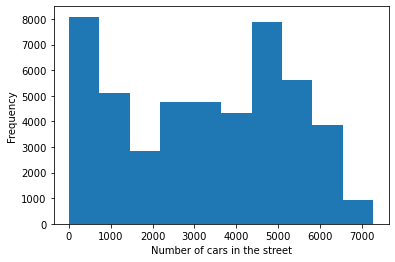

In [5]:
traffic['traffic_volume'].plot.hist()
plt.xlabel('Number of cars in the street')
plt.show()

In [6]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between 2012-10-02 09:00:00 and 2018-09-30 23:00:00, the hourly traffic volume varied from 0 to 7280 cars, with an average of 3260 cars, however 75% of the time there were at least 4933 vehicle passing everyday. Judging from a first glimpse of the dataset (and common sense), the number of car in the street should be influenced by the time. We need to select which observation happened at daytime or at nighttime. 

We are going to consider:

- Daytime data, hours from 7 a.m. to 7 p.m. (12 hours)
- Nighttime data, hours from 7 p.m. to 7 a.m. (12 hours)

In [7]:
print(traffic['date_time'])

0        2012-10-02 09:00:00
1        2012-10-02 10:00:00
2        2012-10-02 11:00:00
3        2012-10-02 12:00:00
4        2012-10-02 13:00:00
                ...         
48199    2018-09-30 19:00:00
48200    2018-09-30 20:00:00
48201    2018-09-30 21:00:00
48202    2018-09-30 22:00:00
48203    2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: object


In [8]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])

In [9]:
print(traffic['date_time'])

0       2012-10-02 09:00:00
1       2012-10-02 10:00:00
2       2012-10-02 11:00:00
3       2012-10-02 12:00:00
4       2012-10-02 13:00:00
                ...        
48199   2018-09-30 19:00:00
48200   2018-09-30 20:00:00
48201   2018-09-30 21:00:00
48202   2018-09-30 22:00:00
48203   2018-09-30 23:00:00
Name: date_time, Length: 48204, dtype: datetime64[ns]


In [10]:
# create two different dataframe depending on time, copying records

day = traffic.copy()[(traffic['date_time'].dt.hour >= 7) & (traffic['date_time'].dt.hour < 19)]
night = traffic.copy()[(traffic['date_time'].dt.hour >= 19) | (traffic['date_time'].dt.hour < 7)]

print(day.shape)
print(night.shape)

(23877, 9)
(24327, 9)


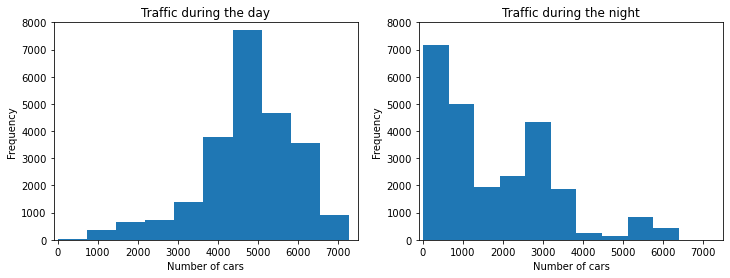

In [11]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
day['traffic_volume'].plot.hist()
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel('Number of cars')
plt.title('Traffic during the day')

plt.subplot(1, 2, 2)
night['traffic_volume'].plot.hist()
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.xlabel('Number of cars')
plt.title('Traffic during the night')
plt.show()

In [12]:
print(day['traffic_volume'].describe())
print('\n')
print(night['traffic_volume'].describe())

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64


count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64


We have two different type of skewed distribution:

- For the **day** traffic, we have a left skewed distribution. This means that most of the time we have a high number of cars. The mean is 4762 cars per hour.
- For the **night** traffic, we have a (sort of) right skewed distribution. This means that we have less cars most of the time. The mean is 1785 car per hour.

While we have some hours with a high number of cars during the night, it's better to search for heavy traffic indicators using data from the day.

The fastest way to get the average traffic volume for each month is by using the [DataFrame.groupby() method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html).

In [13]:
# create a new column where each value describes the month when the traffic volume measurement was taken

day['month'] = day['date_time'].dt.month

# group the dataset by the month column with the mean as an aggregate functionb

by_month = day.groupby('month').mean()

In [14]:
by_month['traffic_volume']

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

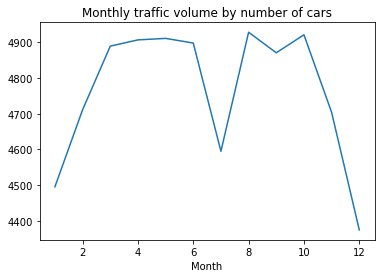

In [15]:
by_month['traffic_volume'].plot.line()
plt.title('Monthly traffic volume by number of cars')
plt.xlabel('Month')
plt.show()

Based on the plot we can see that there is less traffic in the colder months (from November to February), but there is also a dip in traffic during July. Let's try to see if there's a trend every year or if there's a single episode that can explain this dip.

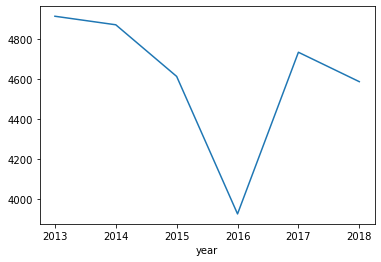

In [16]:
day['year'] = day['date_time'].dt.year
only_july = day[day['month'] == 7]
only_july.groupby('year').mean()['traffic_volume'].plot.line()
plt.show()

Judging from the data, the traffic volume seems to be consistent at more than 4500 cars per day. Except in 2016 where we can see that [there were some road works](https://www.crainsdetroit.com/article/20160728/NEWS/160729841/weekend-construction-i-96-us-23-bridge-work-i-94-lane-closures-i-696).

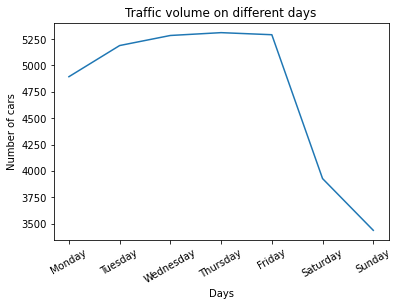

In [17]:
# replicate the code to see the trend for each day of the week (0 is Monday)

day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume'].plot.line()
plt.title('Traffic volume on different days')
plt.xlabel('Days')
plt.ylabel('Number of cars')
plt.xticks(ticks=[0, 1, 2, 3, 4, 5, 6], 
           labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 
           rotation=30) #we use this code to change the number to the proper label
plt.show()

The traffic is noticeably less during the weekend. We found that the traffic volume is significantly heavier on business days compared to the weekends. Let's find out how we can compare different hours.

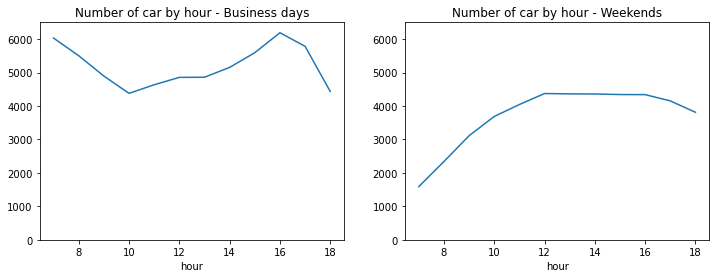

In [18]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4]
weekend = day.copy()[day['dayofweek'] >= 5]
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
by_hour_business['traffic_volume'].plot.line()
plt.title('Number of car by hour - Business days')
plt.ylim(0, 6500)
plt.subplot(1, 2, 2)
by_hour_weekend['traffic_volume'].plot.line()
plt.title('Number of car by hour - Weekends')
plt.ylim(0, 6500)

plt.show()

The traffic is usually higher during business days, with the peak coming through rush hours (7 and 16), while on weekends we have a traffic flow without significant peaks.

To summarize:

* There is more traffic during warm months (March to October), with heavier traffic during business days.
* Usually there is more traffic during rush hours (7 and 16).

Let's find out if we are able to find heavy traffic indicators using weather data:

In [19]:
day.corr()['traffic_volume']

temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
year             -0.003557
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

It seems that the variable traffic volume has the strongest correlation with the temp variable.

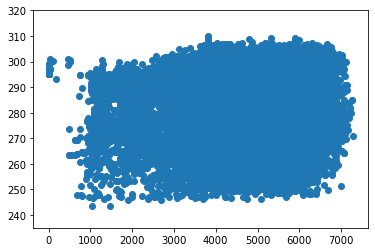

In [20]:
plt.scatter(day['traffic_volume'], day['temp'])
plt.ylim(235, 320)
plt.show()

The graph however does not show a clear and precise correlation, there is only a lot of noise. Let's see if the weather is a stronger indicator of traffic.

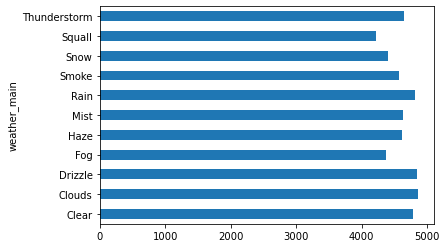

In [21]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_main['traffic_volume'].plot.barh()
plt.show()

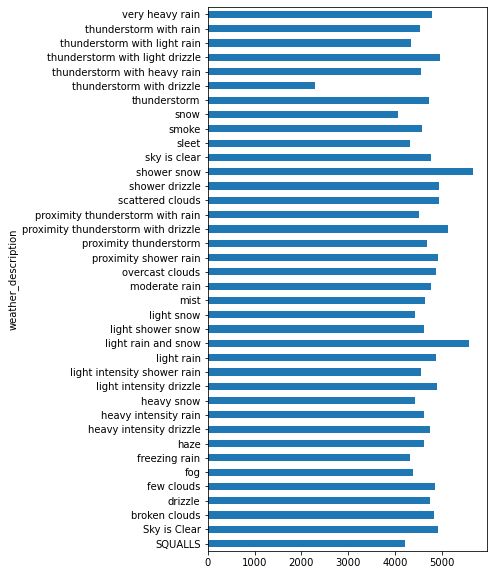

In [23]:
by_weather_description = day.groupby('weather_description').mean()
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

It looks like there are three weather types where traffic volume exceeds 5,000:

* Shower snow
* Light rain and snow
* Proximity thunderstorm with drizzle